In [31]:
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [16]:
stop = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 

In [2]:
df = pd.read_csv("summary.csv")

In [3]:
df

,Unnamed: 0,Year,Content,One line,Five lines
0,0,1934,Origin,Origin,Origin
1,1,1935,Joining the fold...\nAn alcoholic from New Yor...,['Forging friendships in Akron\nBill joins the...,['Bill and Lois join the Oxford Group\nFollowi...
2,2,1936,An offer spurs “group conscience”\nCharles B. ...,['At the Clinton Street meeting that very even...,An offer spurs “group conscience”\nCharles B. ...
3,3,1937,The office that will go down in A.A. history\n...,['Action in Akron\nOxford Group meetings for a...,"['Plans for the future\nIn late 1937, Bill pay..."
4,4,1938,"Rockefeller’s stance\nFrank Amos (right), who ...",['The Alcoholic Foundation\nFrank Amos and oth...,"['Rockefeller’s stance\nFrank Amos (right), wh..."
...,...,...,...,...,...
74,74,2013,French Big Book Celebrates 50 Years\nMarch 201...,[French Big Book Celebrates 50 Years\nMarch 20...,French Big Book Celebrates 50 Years\nMarch 201...
75,75,2014,"Happy Anniversary, Quebec!\nSeventy years ago,...",['Big Book Turns 75\nApril 2014 marks the 75th...,"['Happy Anniversary, Quebec!', 'Seventy years ..."
76,76,2015,Japan celebrates the 40th Anniversary\nIn Febr...,"['At the Sunday morning meeting, the 35 millio...","['A.A.’s 80th Birthday celebrated in Atlanta, ..."
77,77,2016,"A.A. in Addis Ababa, Ethiopia\nThe first Amhar...",['Release of “A New Freedom”\nFilmed inside co...,"['A.A. in Addis Ababa, Ethiopia\nThe first Amh..."


In [48]:
temp = {}
# snow = nltk.stem.SnowballStemmer('english')
our_stop = stop.union({'alcoholic', 'anonymous', 'meeting', 'group', 'member'})
for index, row in df.iterrows():
    sentence = row['Content']
    year = int(row['Year'])
    sentence = sentence.lower()                 # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#\’—“”]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    words = [word.strip() for word in sentence.split()]
    words = [lemmatizer.lemmatize(word.strip()) for word in words]   # Stemming and removing stopwords
    words = [i for i in words if len(i)>1 and i not in our_stop]
    temp[year] = words

In [49]:
our_stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'alcoholic',
 'all',
 'am',
 'an',
 'and',
 'anonymous',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'group',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'meeting',
 'member',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other'

In [50]:
year_sets = [(1935, 1944), (1945, 1954), (1955, 1964), (1965, 1974), (1975, 1984), (1985, 1994), (1995, 2004), (2005, 2017)]


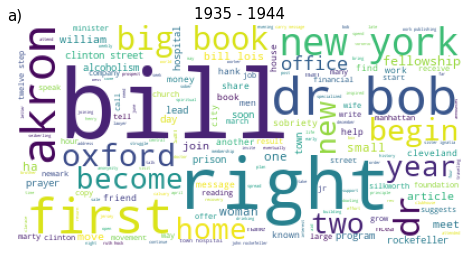

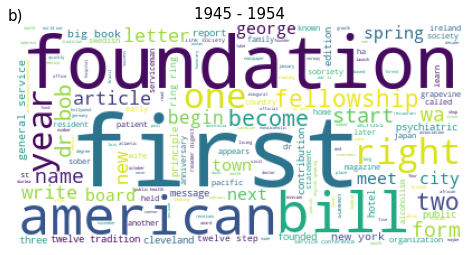

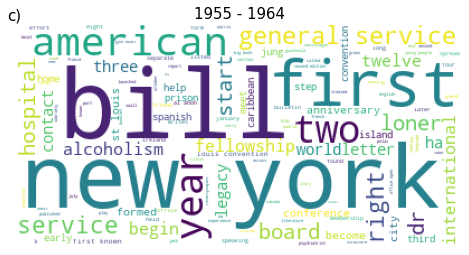

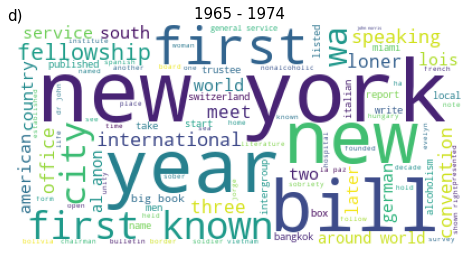

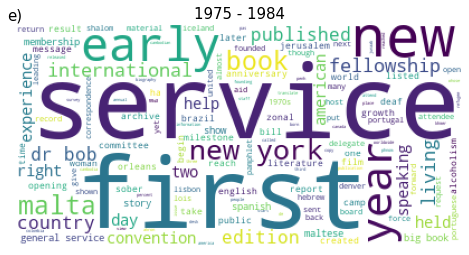

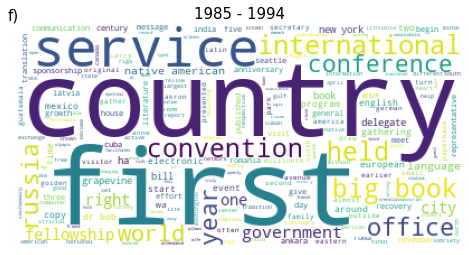

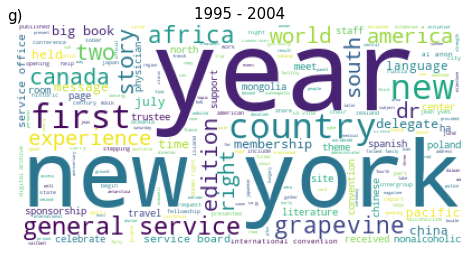

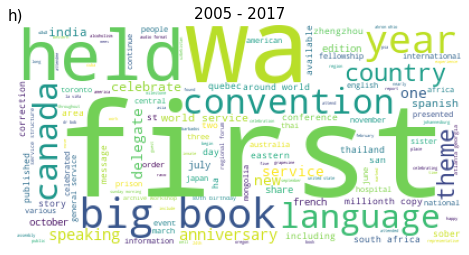

In [71]:
for index, year_set in enumerate(year_sets):
    start, end = year_set[0], year_set[1]
    annot = chr(97+index)
    text = []
    for year in range(start, end+1):
        if year in temp:
            text.extend(temp[year])
        
    
    wordcloud = WordCloud(random_state=1, background_color='white', 
                          collocations=True).generate(" ".join(text))
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.title("{} - {}".format(start, end), size=15)
    plt.imshow(wordcloud) 
    ax.text(-0.02, 1.02, '{})'.format(annot), transform=ax.transAxes, size=15,color='k')
    plt.axis("off")
    fname = "images/{}_{}.png".format(start, end)
    plt.savefig(fname, bbox_inches='tight', dpi=800)
    plt.show()
    


'a'

ValueError: invalid literal for int() with base 10: 'a'